In [3]:
from pandas import *
import pandas
import numpy as np
import matplotlib.pyplot as plt

def side_by_side(*objs, **kwds):
    from pandas.core.common import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print adjoin(space, *reprs)

plt.rc('figure', figsize=(10, 6))
# pandas.set_printoptions(notebook_repr_html=False)

In [4]:
plot(arange(10))

NameError: name 'plot' is not defined

Series
======

In [5]:
randn(5)

NameError: name 'randn' is not defined

In [9]:
labels = ['a', 'b', 'c', 'd', 'e']
s = Series(randn(5), index=labels)
s

a   -0.139871
b   -0.580239
c    1.280341
d   -1.299564
e   -0.360330

In [10]:
'b' in s

True

In [12]:
s['b']

-0.58023865919519868

In [11]:
s.index

Index([a, b, c, d, e], dtype=object)

In [13]:
s

a   -0.139871
b   -0.580239
c    1.280341
d   -1.299564
e   -0.360330

In [14]:
mapping = s.to_dict()
mapping

{'a': -0.13987069666249202,
 'b': -0.58023865919519868,
 'c': 1.2803413944255728,
 'd': -1.2995637798105613,
 'e': -0.36033048832567999}

In [16]:
s = Series(mapping, index=['b', 'e', 'a', 'd', 'f'])
s

b   -0.580239
e   -0.360330
a   -0.139871
d   -1.299564
f         NaN

In [20]:
s[notnull(s)]

b   -0.580239
e   -0.360330
a   -0.139871
d   -1.299564

In [21]:
s.dropna()

b   -0.580239
e   -0.360330
a   -0.139871
d   -1.299564

In [22]:
s * 2

b   -1.160477
e   -0.720661
a   -0.279741
d   -2.599128
f         NaN

In [23]:
s[:3]

b   -0.580239
e   -0.360330
a   -0.139871

In [24]:
s.index

Index([b, e, a, d, f], dtype=object)

DataFrame: 2D collection of Series
==================================

In [27]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)})
df['d'] = range(6)
df

a    b         c  d
0 -0.497943  foo  0.542663  0
1 -1.308615  bar -0.274153  1
2 -1.394336  foo  0.198010  2
3  1.004886  bar -2.211485  3
4 -1.183105  foo -0.923296  4
5  1.007496  bar -1.349994  5

In [33]:
df['b']    # by column

0    foo
1    bar
2    foo
3    bar
4    foo
5    bar
Name: b

In [28]:
df[:3]

a    b         c  d
0 -0.497943  foo  0.542663  0
1 -1.308615  bar -0.274153  1
2 -1.394336  foo  0.198010  2

In [29]:
df[:-2]

a    b         c  d
0 -0.497943  foo  0.542663  0
1 -1.308615  bar -0.274153  1
2 -1.394336  foo  0.198010  2
3  1.004886  bar -2.211485  3

In [30]:
df[-2:]   # the last 2 rows

a    b         c  d
4 -1.183105  foo -0.923296  4
5  1.007496  bar -1.349994  5

In [31]:
np.tile(['foo', 'bar'], 3)   # in numpy

array(['foo', 'bar', 'foo', 'bar', 'foo', 'bar'], 
      dtype='|S3')

In [32]:
df.xs(0)   # returning the first row

a   -0.4979432
b          foo
c    0.5426634
d            0
Name: 0

In [35]:
df.ix[2]    # does equal thing as above. In this case, 3rd row. 

a    -1.394336
b          foo
c    0.1980095
d            2
Name: 2

In [36]:
df.ix[2, 'b']

'foo'

In [38]:
df.get_value(2, 'b')

'foo'

In [39]:
timeit df.ix[2, 'b']

100000 loops, best of 3: 2.93 us per loop


In [41]:
timeit df.get_value(2, 'b')

1000000 loops, best of 3: 1.6 us per loop


In [42]:
df.ix[2:4, 'b']

2    foo
3    bar
4    foo
Name: b

In [44]:
df.ix[2:4, ['b', 'c']]

b         c
2  foo  0.198010
3  bar -2.211485
4  foo -0.923296

In [45]:
df.ix[2:4, 'b':'c']   # slices by column - essentially the same as above.

b         c
2  foo  0.198010
3  bar -2.211485
4  foo -0.923296

In [47]:
df.ix[[0, 2, 4], ['b', 'c', 'd']]   # pass a list of rows and columns I want to select out

b         c  d
0  foo  0.542663  0
2  foo  0.198010  2
4  foo -0.923296  4

In [48]:
df['c'] > 0

0     True
1    False
2     True
3    False
4    False
5    False
Name: c

In [49]:
df.ix[df['c'] > 0]   # boolean arrays

a    b         c  d
0 -0.497943  foo  0.542663  0
2 -1.394336  foo  0.198010  2

In [50]:
df.index

Int64Index([0, 1, 2, 3, 4, 5])

In [51]:
df.columns

Index([a, b, c, d], dtype=object)

In [53]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               index=DateRange('1/1/2000', periods=6))
df

/usr/local/Cellar/python/2.7.2/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas-0.8.1-py2.7-macosx-10.5-intel.egg/pandas/core/daterange.py:21: FutureWarning: DateRange is deprecated, use DatetimeIndex instead
  FutureWarning)


a    b         c
2000-01-03  1.926781  foo -0.904502
2000-01-04  0.678309  bar  2.140457
2000-01-05 -0.846715  foo  0.620089
2000-01-06  0.462977  bar  1.282020
2000-01-07 -0.704591  foo  1.366704
2000-01-10  0.465697  bar -0.575587

In [54]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               columns=['a', 'b', 'c', 'd'])
df

a    b         c   d
0  0.598279  foo  1.155302 NaN
1  0.491108  bar -1.693307 NaN
2 -0.529175  foo -2.867020 NaN
3 -0.758212  bar  0.615492 NaN
4  0.977810  foo  1.549035 NaN
5 -2.104020  bar -2.671483 NaN

In [55]:
isnull(df)

a      b      c     d
0  False  False  False  True
1  False  False  False  True
2  False  False  False  True
3  False  False  False  True
4  False  False  False  True
5  False  False  False  True

Creation from nested dicts
--------------------------

These arise naturally in Python code

In [64]:
data = {}
for col in ['foo', 'bar', 'baz']:
    for row in ['a', 'b', 'c', 'd']:
        data.setdefault(col, {})[row] = randn()   # sorted cols: bar, baz, foo
data

{'bar': {'a': 0.9295182780071557,
  'b': 0.629167406292866,
  'c': 0.7481003106804884,
  'd': -0.7406144327794744},
 'baz': {'a': -0.47898235355732777,
  'b': 1.3748698924766567,
  'c': -0.35506751008916465,
  'd': 0.6257300406561229},
 'foo': {'a': 1.1424385903258707,
  'b': -1.7092715082842402,
  'c': 0.6934118811100397,
  'd': 0.1536432266628359}}

In [65]:
del data ['foo']['c']   # delete an entry by index key (col) and row.

In [66]:
DataFrame(data)   # pass a dict 

bar       baz       foo
a  0.929518 -0.478982  1.142439
b  0.629167  1.374870 -1.709272
c  0.748100 -0.355068       NaN
d -0.740614  0.625730  0.153643

Data alignment
==============

In [5]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=True)

In [2]:
!head -n 10 stock_data.csv

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29 00:00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30 00:00:00,36.43,187.0,34.39,106.15,56.99,32.7,65.8,1531.02,83.25
2007-10-31 00:00:00,36.79,189.95,34.97,108.01,57.3,33.84,65.69,1549.38,84.03
2007-11-01 00:00:00,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02 00:00:00,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05 00:00:00,35.22,186.18,34.15,105.48,56.7,33.77,64.84,1502.17,80.07
2007-11-06 00:00:00,35.84,191.79,34.14,105.27,56.8,33.47,65.49,1520.27,82.56
2007-11-07 00:00:00,34.76,186.3,33.2,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08 00:00:00,35.0,175.47,33.15,99.05,56.79,31.94,65.5,1474.77,82.0


In [6]:
close_px

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2007-10-29 00:00:00 to 2011-10-14 00:00:00
Data columns:
AA      1000  non-null values
AAPL    1000  non-null values
GE      1000  non-null values
IBM     1000  non-null values
JNJ     1000  non-null values
MSFT    1000  non-null values
PEP     1000  non-null values
SPX     1000  non-null values
XOM     1000  non-null values
dtypes: float64(9)

In [5]:
s1 = close_px['AAPL'][-20:]      # the last 20 rows
s2 = close_px['AAPL'][-25:-10]   # the last 25 - last 10 = 15 rows.
side_by_side(s1, s2)

2011-09-19    411.63    2011-09-12    379.94
2011-09-20    413.45    2011-09-13    384.62
2011-09-21    412.14    2011-09-14    389.30
2011-09-22    401.82    2011-09-15    392.96
2011-09-23    404.30    2011-09-16    400.50
2011-09-26    403.17    2011-09-19    411.63
2011-09-27    399.26    2011-09-20    413.45
2011-09-28    397.01    2011-09-21    412.14
2011-09-29    390.57    2011-09-22    401.82
2011-09-30    381.32    2011-09-23    404.30
2011-10-03    374.60    2011-09-26    403.17
2011-10-04    372.50    2011-09-27    399.26
2011-10-05    378.25    2011-09-28    397.01
2011-10-06    377.37    2011-09-29    390.57
2011-10-07    369.80    2011-09-30    381.32
2011-10-10    388.81    Name: AAPL          
2011-10-11    400.29                        
2011-10-12    402.19                        
2011-10-13    408.43                        
2011-10-14    422.00                        
Name: AAPL                                  


In [8]:
s1 + s2

2011-09-12       NaN
2011-09-13       NaN
2011-09-14       NaN
2011-09-15       NaN
2011-09-16       NaN
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03       NaN
2011-10-04       NaN
2011-10-05       NaN
2011-10-06       NaN
2011-10-07       NaN
2011-10-10       NaN
2011-10-11       NaN
2011-10-12       NaN
2011-10-13       NaN
2011-10-14       NaN
Name: AAPL

In [9]:
s1.add(s2, fill_value=0)

2011-09-12    379.94
2011-09-13    384.62
2011-09-14    389.30
2011-09-15    392.96
2011-09-16    400.50
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03    374.60
2011-10-04    372.50
2011-10-05    378.25
2011-10-06    377.37
2011-10-07    369.80
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL

In [7]:
(s1 + s2).dropna()

2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
Name: AAPL

In [21]:
df = close_px.ix[-10:, :3]
df

In [22]:
side_by_side(s1.reindex(s2.index), s2)   # align indexes of s1 and s2. Print 2 objects alongside each other.

In [6]:
side_by_side(s1.ix[s2.index], s2)   # same as above, supported in newer version of 0.12 ipython.

2011-09-12       NaN    2011-09-12    379.94
2011-09-13       NaN    2011-09-13    384.62
2011-09-14       NaN    2011-09-14    389.30
2011-09-15       NaN    2011-09-15    392.96
2011-09-16       NaN    2011-09-16    400.50
2011-09-19    411.63    2011-09-19    411.63
2011-09-20    413.45    2011-09-20    413.45
2011-09-21    412.14    2011-09-21    412.14
2011-09-22    401.82    2011-09-22    401.82
2011-09-23    404.30    2011-09-23    404.30
2011-09-26    403.17    2011-09-26    403.17
2011-09-27    399.26    2011-09-27    399.26
2011-09-28    397.01    2011-09-28    397.01
2011-09-29    390.57    2011-09-29    390.57
2011-09-30    381.32    2011-09-30    381.32
Name: AAPL              Name: AAPL          


In [23]:
b, c  = s1.align(s2, join='inner')
side_by_side(b, c)

In [24]:
b, c  = s1.align(s2, join='outer')
side_by_side(b, c)

In [25]:
b, c  = s1.align(s2, join='right')
side_by_side(b, c)

In [7]:
df = close_px.ix[-10:, ['AAPL', 'IBM', 'MSFT']]
df

AAPL     IBM   MSFT
2011-10-03  374.60  173.29  24.53
2011-10-04  372.50  174.74  25.34
2011-10-05  378.25  176.85  25.89
2011-10-06  377.37  181.69  26.34
2011-10-07  369.80  182.39  26.25
2011-10-10  388.81  186.62  26.94
2011-10-11  400.29  185.00  27.00
2011-10-12  402.19  186.12  26.96
2011-10-13  408.43  186.82  27.18
2011-10-14  422.00  190.53  27.27

In [8]:
df2 = df.ix[::2, ['IBM', 'MSFT']]
side_by_side(df, df2)

              AAPL     IBM   MSFT                   IBM   MSFT
2011-10-03  374.60  173.29  24.53    2011-10-03  173.29  24.53
2011-10-04  372.50  174.74  25.34    2011-10-05  176.85  25.89
2011-10-05  378.25  176.85  25.89    2011-10-07  182.39  26.25
2011-10-06  377.37  181.69  26.34    2011-10-11  185.00  27.00
2011-10-07  369.80  182.39  26.25    2011-10-13  186.82  27.18
2011-10-10  388.81  186.62  26.94                             
2011-10-11  400.29  185.00  27.00                             
2011-10-12  402.19  186.12  26.96                             
2011-10-13  408.43  186.82  27.18                             
2011-10-14  422.00  190.53  27.27                             


In [28]:
df + df2

In [29]:
b, c = df.align(df2, join='inner')
side_by_side(b, c) 

Transposing: no copy if all columns are same type
-------------------------------------------------

In [9]:
df[:5].T

2011-10-03  2011-10-04  2011-10-05  2011-10-06  2011-10-07
AAPL      374.60      372.50      378.25      377.37      369.80
IBM       173.29      174.74      176.85      181.69      182.39
MSFT       24.53       25.34       25.89       26.34       26.25

Columns can be any type
-----------------------

In [10]:
n = 10
foo = DataFrame(index=range(n))
foo['floats'] = np.random.randn(n)
foo['ints'] = np.arange(n)
foo['strings'] = ['foo', 'bar'] * (n / 2)
foo['bools'] = foo['floats'] > 0
foo['objects'] = DateRange('1/1/2000', periods=n)
foo

/usr/local/Cellar/python/2.7.2/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas-0.8.1-py2.7-macosx-10.5-intel.egg/pandas/core/daterange.py:21: FutureWarning: DateRange is deprecated, use DatetimeIndex instead
  FutureWarning)


floats  ints strings  bools             objects
0 -0.585959     0     foo  False 2000-01-03 00:00:00
1  0.675488     1     bar   True 2000-01-04 00:00:00
2  1.801818     2     foo   True 2000-01-05 00:00:00
3  0.665562     3     bar   True 2000-01-06 00:00:00
4 -1.089721     4     foo  False 2000-01-07 00:00:00
5 -0.298291     5     bar  False 2000-01-10 00:00:00
6  0.657715     6     foo   True 2000-01-11 00:00:00
7 -0.182239     7     bar  False 2000-01-12 00:00:00
8 -0.145589     8     foo  False 2000-01-13 00:00:00
9  0.551702     9     bar   True 2000-01-14 00:00:00

In [11]:
foo.dtypes

floats            float64
ints                int64
strings            object
bools                bool
objects    datetime64[ns]

N.B. transposing is not roundtrippable in this case (column-oriented data structure)

In [12]:
foo.T.T

floats ints strings  bools              objects
0 -0.5859591    0     foo  False  2000-01-03 00:00:00
1   0.675488    1     bar   True  2000-01-04 00:00:00
2   1.801818    2     foo   True  2000-01-05 00:00:00
3  0.6655621    3     bar   True  2000-01-06 00:00:00
4  -1.089721    4     foo  False  2000-01-07 00:00:00
5 -0.2982908    5     bar  False  2000-01-10 00:00:00
6  0.6577153    6     foo   True  2000-01-11 00:00:00
7  -0.182239    7     bar  False  2000-01-12 00:00:00
8 -0.1455885    8     foo  False  2000-01-13 00:00:00
9  0.5517019    9     bar   True  2000-01-14 00:00:00

In [34]:
foo.T.T.dtypes

Function application
====================

You can apply arbitrary functions to the rows or columns of a DataFrame

In [13]:
df.apply(np.mean)

AAPL    389.424
IBM     182.405
MSFT     26.370

In [14]:
df.mean()   # same as above.   df.mean? to look up the function usage.

AAPL    389.424
IBM     182.405
MSFT     26.370

In [15]:
df.mean(1)   # get the mean of the rows based on a column. Also excludes missing data (NaN: not a number).

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667

In [17]:
df.mean(1, skipna=False)   # flag skipna: to include NaN. In this data, no NaN.

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667

In [16]:
df.apply(np.mean, axis=1)   # same as above.

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667

You can get as fancy as you want

In [18]:
close_px    # Output: 1000 rows.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2007-10-29 00:00:00 to 2011-10-14 00:00:00
Data columns:
AA      1000  non-null values
AAPL    1000  non-null values
GE      1000  non-null values
IBM     1000  non-null values
JNJ     1000  non-null values
MSFT    1000  non-null values
PEP     1000  non-null values
SPX     1000  non-null values
XOM     1000  non-null values
dtypes: float64(9)

In [19]:
close_px.AAPL     # For easier typing, after dot ., use tab to select the name of the stock.

2007-10-29    185.09
2007-10-30    187.00
2007-10-31    189.95
2007-11-01    187.44
2007-11-02    187.87
2007-11-05    186.18
2007-11-06    191.79
2007-11-07    186.30
2007-11-08    175.47
2007-11-09    165.37
2007-11-12    153.76
2007-11-13    169.96
2007-11-14    166.11
2007-11-15    164.30
2007-11-16    166.39
...
2011-09-26    403.17
2011-09-27    399.26
2011-09-28    397.01
2011-09-29    390.57
2011-09-30    381.32
2011-10-03    374.60
2011-10-04    372.50
2011-10-05    378.25
2011-10-06    377.37
2011-10-07    369.80
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL, Length: 1000

In [21]:
close_px.AAPL.idxmax() # gives index of its maximum value.

<Timestamp: 2011-10-14 00:00:00>

In [22]:
close_px.AAPL.index[close_px.AAPL.argmax()]    # If you are numpy aficionado, does the same thing.

<Timestamp: 2011-10-14 00:00:00>

In [23]:
def peak_date(series):
    return series.index[series.argmax()]    # new method: series.idxmax()
close_px.apply(peak_date)

AA      2008-05-19 00:00:00
AAPL    2011-10-14 00:00:00
GE      2007-10-31 00:00:00
IBM     2011-10-14 00:00:00
JNJ     2011-07-07 00:00:00
MSFT    2007-11-01 00:00:00
PEP     2008-01-10 00:00:00
SPX     2007-10-31 00:00:00
XOM     2008-05-20 00:00:00

In [24]:
df.apply(lambda x: x.max() - x.min()) # np.ptp

AAPL    52.20
IBM     17.24
MSFT     2.74

In [25]:
np.log(close_px)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2007-10-29 00:00:00 to 2011-10-14 00:00:00
Data columns:
AA      1000  non-null values
AAPL    1000  non-null values
GE      1000  non-null values
IBM     1000  non-null values
JNJ     1000  non-null values
MSFT    1000  non-null values
PEP     1000  non-null values
SPX     1000  non-null values
XOM     1000  non-null values
dtypes: float64(9)

Plotting
========

Some basic plotting integration with matplotlib in Series / DataFrame

In [26]:
close_px[['AAPL', 'IBM', 'MSFT', 'XOM']]#.plot()    # Can pass a list of col names to get items, so you don't have to use ix.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2007-10-29 00:00:00 to 2011-10-14 00:00:00
Data columns:
AAPL    1000  non-null values
IBM     1000  non-null values
MSFT    1000  non-null values
XOM     1000  non-null values
dtypes: float64(4)

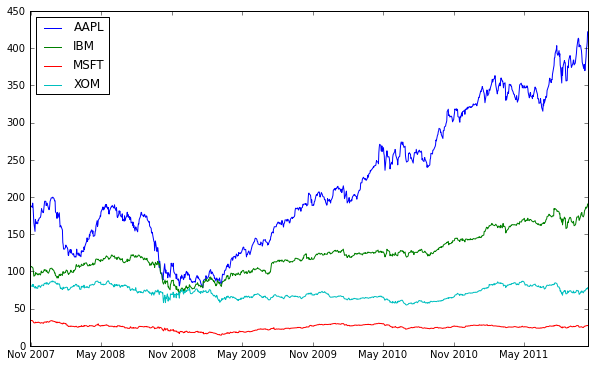

In [27]:
close_px[['AAPL', 'IBM', 'MSFT', 'XOM']].plot() 

In [30]:
close_px.ix[-1]

AA        10.26
AAPL     422.00
GE        16.60
IBM      190.53
JNJ       64.72
MSFT      27.27
PEP       62.24
SPX     1224.58
XOM       78.11
Name: 2011-10-14 00:00:00

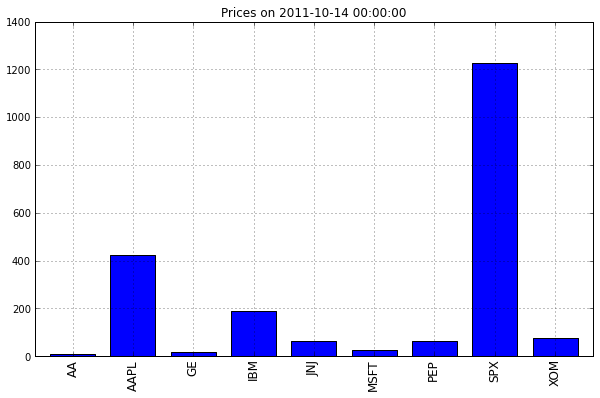

In [29]:
close_px.ix[-1].plot(kind='bar')    # the last row of the data.
title('Prices on %s' % close_px.index[-1])
axhline(0)

Hierarchical indexing
---------------------

In [44]:
index = MultiIndex(levels=[['foo', 'bar', 'baz', 'qux'],
                                   ['one', 'two', 'three']],
                           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3, 3],
                                   [0, 1, 2, 0, 1, 1, 2, 0, 1, 2]])
hdf = DataFrame(np.random.randn(10, 3), index=index,
                columns=['A', 'B', 'C'])
hdf

In [45]:
hdf.ix['foo']

In [46]:
hdf.ix['foo'] = 0
hdf

In [47]:
hdf.ix['foo', 'three']

Stacking and unstacking
-----------------------

In [48]:
tuples = zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']])
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(randn(8, 4), index=index, columns=columns)
df

In [49]:
df2 = df.ix[[0, 1, 2, 4, 5, 7]]
df2

In [50]:
df.unstack()['B']

GroupBy
=======

In [51]:
df = DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                'B' : ['one', 'one', 'two', 'three',
                       'two', 'two', 'one', 'three'],
                'C' : np.random.randn(8),
                'D' : np.random.randn(8)})
df

In [52]:
for key, group in df.groupby('A'):
    print key
    print group

In [53]:
df.groupby('A')['C'].describe().T

In [54]:
df.groupby('A').mean()

In [55]:
for key, group in df.groupby('A'):
    print key
    print group

In [56]:
df.groupby(['A', 'B']).mean()

In [57]:
df.groupby(['A', 'B'], as_index=False).mean()

GroupBy example: linear regression by group
-------------------------------------------

In [58]:
import scikits.statsmodels.api as sm
rets = close_px / close_px.shift(1) - 1

def get_beta(rets):
    rets = rets.dropna()
    rets['intercept'] = 1.
    model = sm.OLS(rets['MSFT'], rets.ix[:, ['AAPL', 'intercept']]).fit()
    return model.params

get_beta(rets)

In [59]:
grouped = rets.groupby([lambda x: x.year, lambda x: x.month])
beta_by_ym = grouped.apply(get_beta)
beta_by_ym

In [60]:
beta_by_ym.unstack(0)['AAPL']

GroupBy with hierarchical indexing
----------------------------------

In [61]:
tuples = zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']])
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(randn(8, 4), index=index, columns=columns)
df

In [62]:
df.groupby(level=0, axis=0).mean()

In [63]:
df.stack()

In [64]:
df.stack().mean(1).unstack()

In [65]:
# could also have done
df.groupby(level=1, axis=1).mean()